In [22]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# loading the dataset

cc_app = pd.read_csv('crx.data', header = None)
cc_app.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [24]:
# printing summary statistics
cc_app.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [25]:
cc_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [26]:
cc_app.tail(20)  # there are missing values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [27]:
cc_app = cc_app.replace('?',np.nan)
cc_app.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [28]:
# imputing missing values with mean, but only for numeric data

cc_app.fillna(cc_app.mean(), inplace = True)
cc_app.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [29]:
# imputing missing values in nonnumeric column with the most frequent values

for col in cc_app:
    if cc_app[col].dtype == 'object':
        cc_app = cc_app.fillna(cc_app[col].value_counts().index[0])
        
print(cc_app.isna())

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
685  False  False  False  False  False  False  False  False  False  False   
686  False  False  False  False  False  False  False  False  False  False   
687  False  False  False  False  False  False  False  False  False  False   
688  False  False  False  False  False  False  False  False  False  False   
689  False  False  False  False  False  False  False  False  False  False   

        10     11     12     13     14     15  
0    False  False  False  F

In [30]:
# converting non numeric to numeric using label encoder

le = LabelEncoder()
for col in cc_app:
    if cc_app[col].dtype == 'object':
        cc_app[col] = le.fit_transform(cc_app[col])
            
cc_app.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,90,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,67,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,67,1,1
688,1,20,0.205,2,1,0,8,0.04,0,0,0,0,0,96,750,1
689,1,197,3.375,2,1,2,4,8.29,0,0,0,1,0,0,0,1


In [31]:
# train test split and then scaling, because test data should not be part of scaling for training data

#drop column 11 and 13 as they are not imp features, driverlicense, zipcode
# and convert the dataframe to numpy arrays
cc_app = cc_app.drop([11, 13], axis = 1)
cc_app = cc_app.values

# separate the features and labels

x,y = cc_app[:,0:13], cc_app[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [32]:
# scaling

scaler = MinMaxScaler(feature_range = (0,1))
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

# Logistic Regression

Accuracy of Logistic regression classfier:  0.8405797101449275
[[87 10]
 [23 87]]


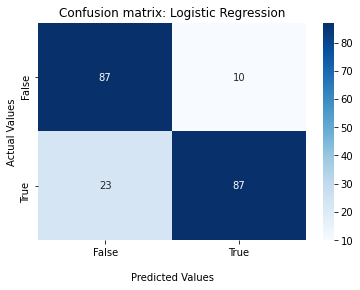

In [33]:
lg = LogisticRegression()
lg.fit(scaled_x_train, y_train)

y_pred = lg.predict(scaled_x_test)

#print accuracy score 

print('Accuracy of Logistic regression classfier: ', lg.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: Logistic Regression')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [34]:
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol = tol, max_iter = max_iter)

gm = GridSearchCV(estimator = lg, param_grid = param_grid, cv= 5)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


# Decision Tree

Accuracy of Decision Tree classfier:  0.5603864734299517
[[77 20]
 [71 39]]


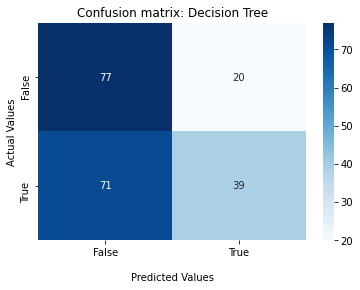

In [35]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)
dt.fit(scaled_x_train, y_train)

y_pred = dt.predict(scaled_x_test)

#print accuracy score 

print('Accuracy of Decision Tree classfier: ', dt.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: Decision Tree')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [36]:
param_grid = {'criterion':['gini','entropy'],
                  'max_depth':[4,5,6,7,8,9,10,12,15,20,25,30,40,50,70,90,120,150]}

gm = GridSearchCV(estimator = dt, param_grid = param_grid, cv= 5)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.821739 using {'criterion': 'gini', 'max_depth': 5}


# Random Forest

Accuracy of Random Forest classfier:  0.8357487922705314
[[81 16]
 [18 92]]


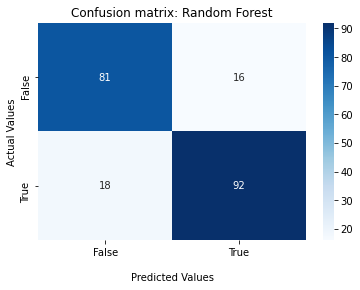

In [37]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = 12, min_samples_leaf = 16, random_state = 40)
rf.fit(scaled_x_train, y_train)

y_pred = rf.predict(scaled_x_test)

#print accuracy score 

print('Accuracy of Random Forest classfier: ', rf.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: Random Forest')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [38]:
param_grid = {'n_estimators':[10,20,50,100],
              'max_depth':[3,6,9,12,15],
              'min_samples_leaf':[2,4,6,8,12,16]}

gm = GridSearchCV(estimator = rf, param_grid = param_grid, cv= 5)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.857971 using {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 100}


# SVM

Accuracy of Support Vector Machine:  0.8405797101449275
[[89  8]
 [25 85]]


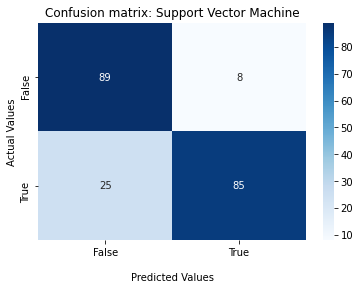

In [39]:
sv = svm.SVC(C = 0.8, kernel = 'linear', gamma = 0.01)
sv.fit(scaled_x_train, y_train)

y_pred = sv.predict(scaled_x_test)

#print accuracy score 

print('Accuracy of Support Vector Machine: ', sv.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: Support Vector Machine')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [40]:
param_grid = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['linear']}

gm = GridSearchCV(estimator = sv, param_grid = param_grid, cv= 5)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.860870 using {'C': 10, 'gamma': 0.1, 'kernel': 'linear', 'probability': True}


# XGboost





Accuracy of XGBoost:  0.855072463768116
[[85 12]
 [18 92]]


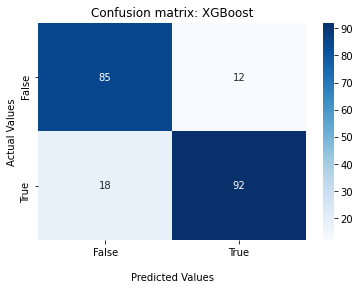

In [44]:
xg = XGBClassifier(n_estimators = 250,
                   max_depth = 12,
                   min_child_weight = 8,
                   subsample = 0.8,
                   learning_rate = 0.02,
                   seed = 42,
                   eval_metric='mlogloss')
xg.fit(scaled_x_train, y_train)

y_pred = xg.predict(scaled_x_test)

#print accuracy score 

print('\n\n\n\nAccuracy of XGBoost: ', xg.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: XGBoost')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [45]:
param_grid = {'n_estimators': [10,50,100,150,250],
              'max_depth' : [3,6,8,12],
              'min_child_weight' : [1,3,8],
              'subsample' : [0.4,0.8],
              'learning_rate' : [0.01,0.05,0.1,0.2,0.5]
              }

gm = GridSearchCV(estimator = xg, param_grid = param_grid, cv= 5)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.866667 using {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.4}


# KNN

In [ ]:
knn= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
knn.fit(scaled_x_train, y_train)

y_pred = knn.predict(scaled_x_test)
#print(y_pred)

#print accuracy score 

print('Accuracy of KNN: ', knn.score(scaled_x_test, y_test))
cf = confusion_matrix(y_test, y_pred)
print(cf)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')
ax.set_title('Confusion matrix: KNN')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
knn.get_params().keys()

### GridSearch for KNN

In [ ]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range, )

gm = GridSearchCV(estimator = knn, param_grid = param_grid, cv= 10)

scaled_X = scaler.fit_transform(x)

grid_model_result = gm.fit(scaled_X, y)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print('Best: %f using %s' %(grid_model_result.best_score_, grid_model_result.best_params_))